In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import entropy

In [3]:
df = pd.read_csv("C:/Users/howie/Desktop/STA 160/Midterm Project/heart_disease_health_indicators_BRFSS2015.csv")

## Conditional Entropy between Infused Variable and other variable

In [4]:

# Calculate the conditional entropy
def conditional_entropy(y, x):
    joint_prob = pd.crosstab(y, x, normalize='all')
    cond_prob = joint_prob.div(joint_prob.sum(axis=0), axis=1)
    cond_ent = - (joint_prob * np.log2(cond_prob)).sum().sum()
    return cond_ent


In [6]:
from itertools import combinations

In [7]:
df['HeartDiseaseStroke'] = df['HeartDiseaseorAttack'].astype(str) + ',' + df['Stroke'].astype(str)

# Categorize 'BMI'
bins = [0, 18.5, 25, 30, np.inf]
labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obese']
df['BMICategory'] = pd.cut(df['BMI'], bins=bins, labels=labels)

variables = ['Age', 'Education', 'Income', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'BMICategory']

# All combinations of variables
var_combinations = list(combinations(variables, 2))

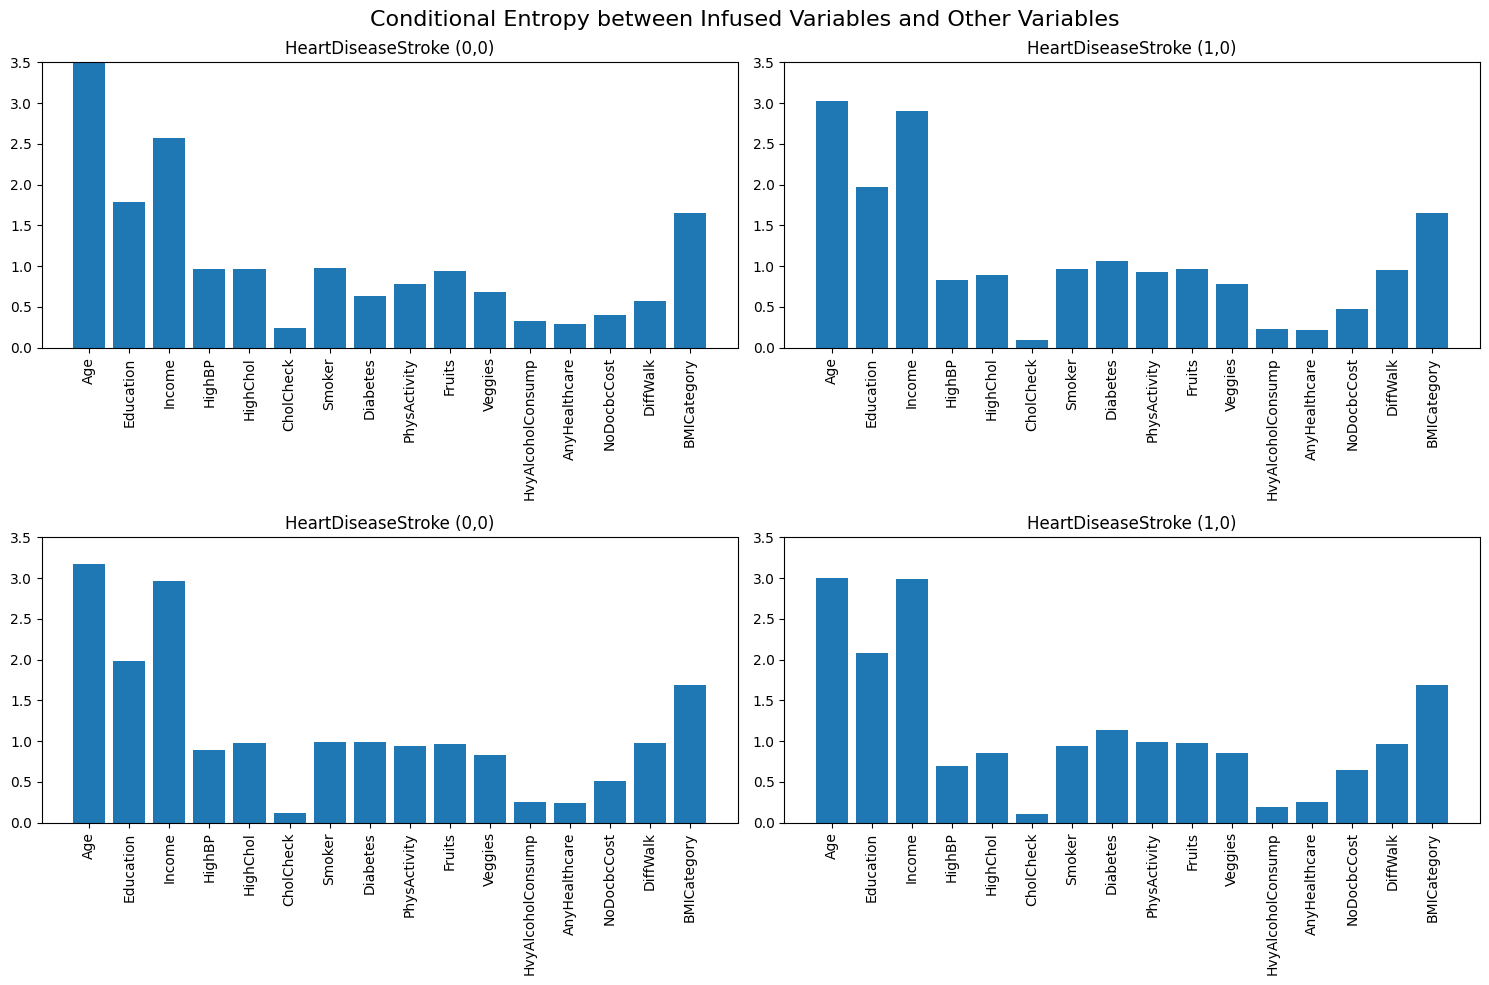

In [12]:
# Create a dictionary to hold the results
results = {}

# Loop over each category in 'HeartDiseaseStroke'
for category in df['HeartDiseaseStroke'].unique():
    # Filter the data for the current category
    df_filtered = df[df['HeartDiseaseStroke'] == category]

    # Calculate the conditional entropy with all other variables
    cond_entropies = {var: conditional_entropy(df_filtered[var], df_filtered['HeartDiseaseStroke']) 
                      for var in variables}

    # Add the results to the dictionary
    results[category] = cond_entropies

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Conditional Entropy between Infused Variables and Other Variables', fontsize=16)

axs = axs.ravel()

for i, (category, cond_entropies) in enumerate(results.items()):
    names = list(cond_entropies.keys())
    values = list(cond_entropies.values())

    axs[i].bar(names, values)
    axs[i].set_title(f'HeartDiseaseStroke ({int(category[0])},{int(category[2])})')
    axs[i].set_ylim(0, 3.5)
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

CholCheck                     0.0     1.0
HeartDiseaseorAttack Stroke              
0.0                  0.0     9095  214337
                     1.0      104    6251
1.0                  0.0      220   19736
                     1.0       51    3886


<Figure size 800x600 with 0 Axes>

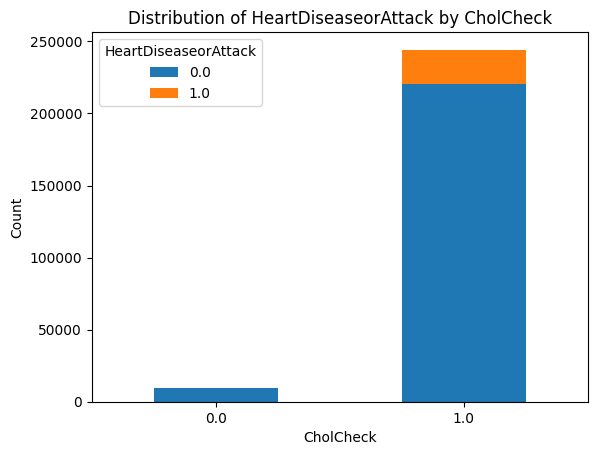

In [16]:
cross_tab = pd.crosstab(index=[df['HeartDiseaseorAttack'], df['Stroke']], columns=df['CholCheck'], rownames=['HeartDiseaseorAttack', 'Stroke'], colnames=['CholCheck'])
print(cross_tab)



In [6]:
cross_tab = pd.crosstab(index=[df['HeartDiseaseorAttack'], df['Stroke']], columns=df['NoDocbcCost'], rownames=['HeartDiseaseorAttack', 'Stroke'], colnames=['NoDocbcCost'])
print(cross_tab)

NoDocbcCost                     0.0    1.0
HeartDiseaseorAttack Stroke               
0.0                  0.0     205436  17996
                     1.0       5646    709
1.0                  0.0      17948   2008
                     1.0       3296    641


In [5]:
cross_tab = pd.crosstab(index=[df['HeartDiseaseorAttack'], df['Stroke']], columns=[df['NoDocbcCost'],df['Sex']], rownames=['HeartDiseaseorAttack', 'Stroke'], colnames=['NoDocbcCost','Sex'])
print(cross_tab)

NoDocbcCost                     0.0           1.0      
Sex                             0.0    1.0    0.0   1.0
HeartDiseaseorAttack Stroke                            
0.0                  0.0     116411  89025  11603  6393
                     1.0       3276   2370    479   230
1.0                  0.0       7206  10742   1068   940
                     1.0       1559   1737    372   269


Further infuse with other variable

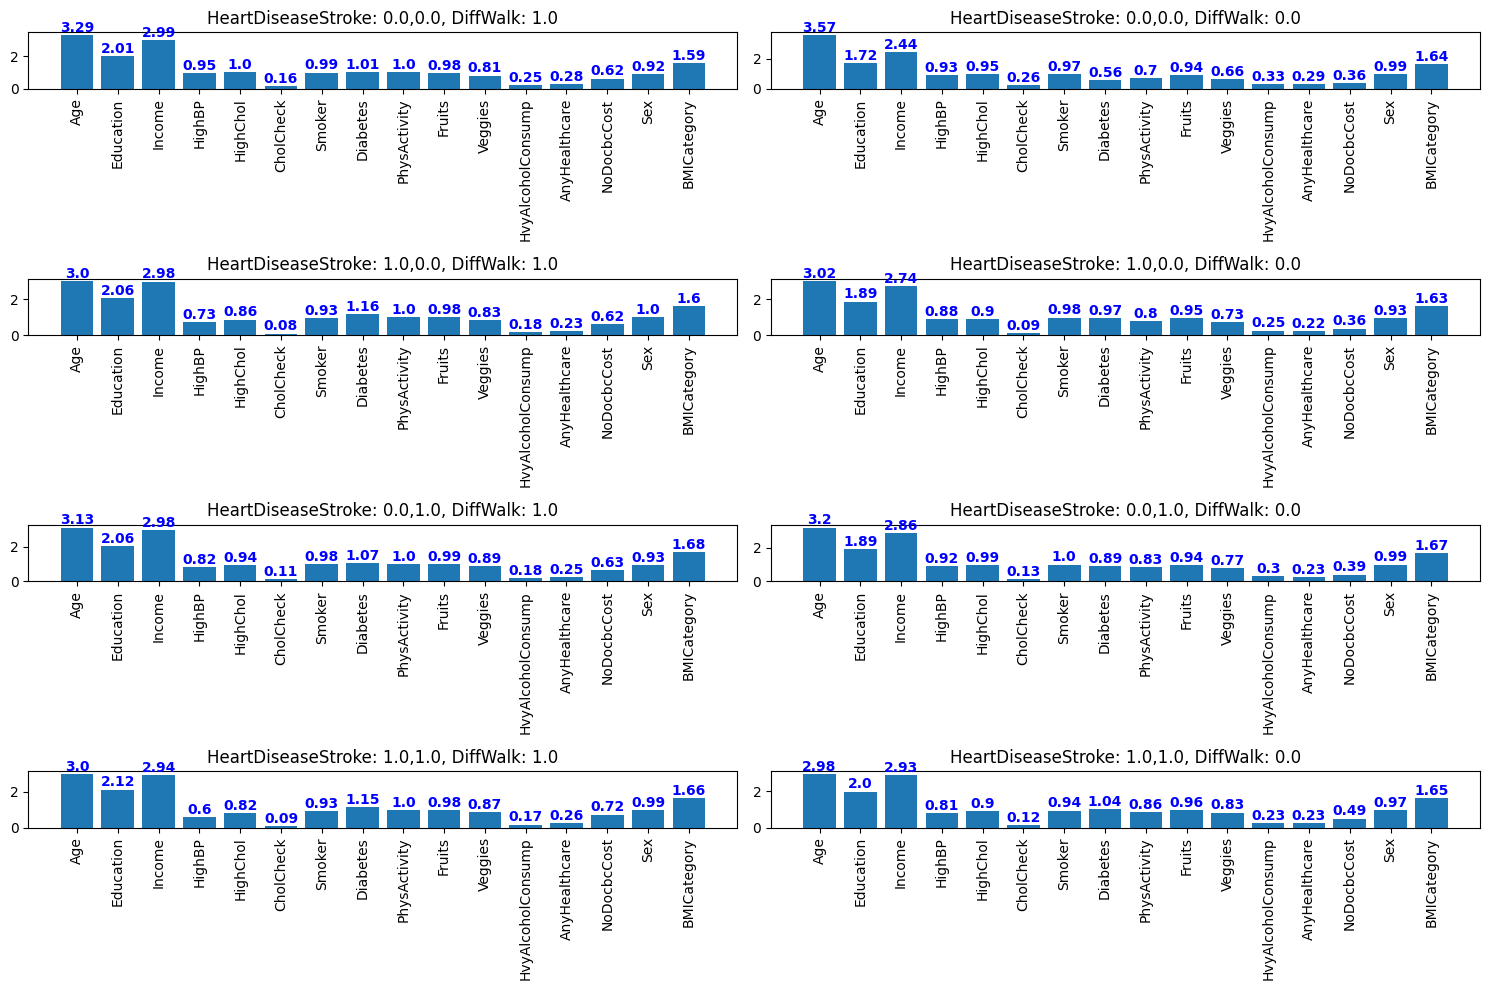

In [10]:
# Create a dictionary to hold the results
results = {}

# Loop over each category in 'HeartDiseaseStroke'
for category in df['HeartDiseaseStroke'].unique():
    # Loop over each category in 'Sex'
    for DiffWalk in df['DiffWalk'].unique():
        # Filter the data for the current HeartDiseaseStroke and Sex categories
        df_filtered = df[(df['HeartDiseaseStroke'] == category) & (df['DiffWalk'] == DiffWalk)]

        # Calculate the conditional entropy with all other variables
        variables = ['Age', 'Education', 'Income', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex', 'BMICategory']
        cond_entropies = {var: conditional_entropy(df_filtered[var], df_filtered['HeartDiseaseStroke']) 
                          for var in variables}

        # Add the results to the dictionary
        results[(category, DiffWalk)] = cond_entropies

# Plot the results
fig, axs = plt.subplots(len(df['HeartDiseaseStroke'].unique()), len(df['DiffWalk'].unique()), figsize=(15, 10))
axs = axs.ravel()

for i, ((category, DiffWalk), cond_entropies) in enumerate(results.items()):
    names = list(cond_entropies.keys())
    values = list(cond_entropies.values())

    axs[i].bar(names, values)
    axs[i].set_title(f'HeartDiseaseStroke: {category}, DiffWalk: {DiffWalk}')
    axs[i].tick_params(axis='x', rotation=90)

    # Add labels to each bar
    for j, v in enumerate(values):
        axs[i].text(j, v + 0.01, str(round(v, 2)), color='blue', fontweight='bold', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Mutual Information between infused variable and other variables

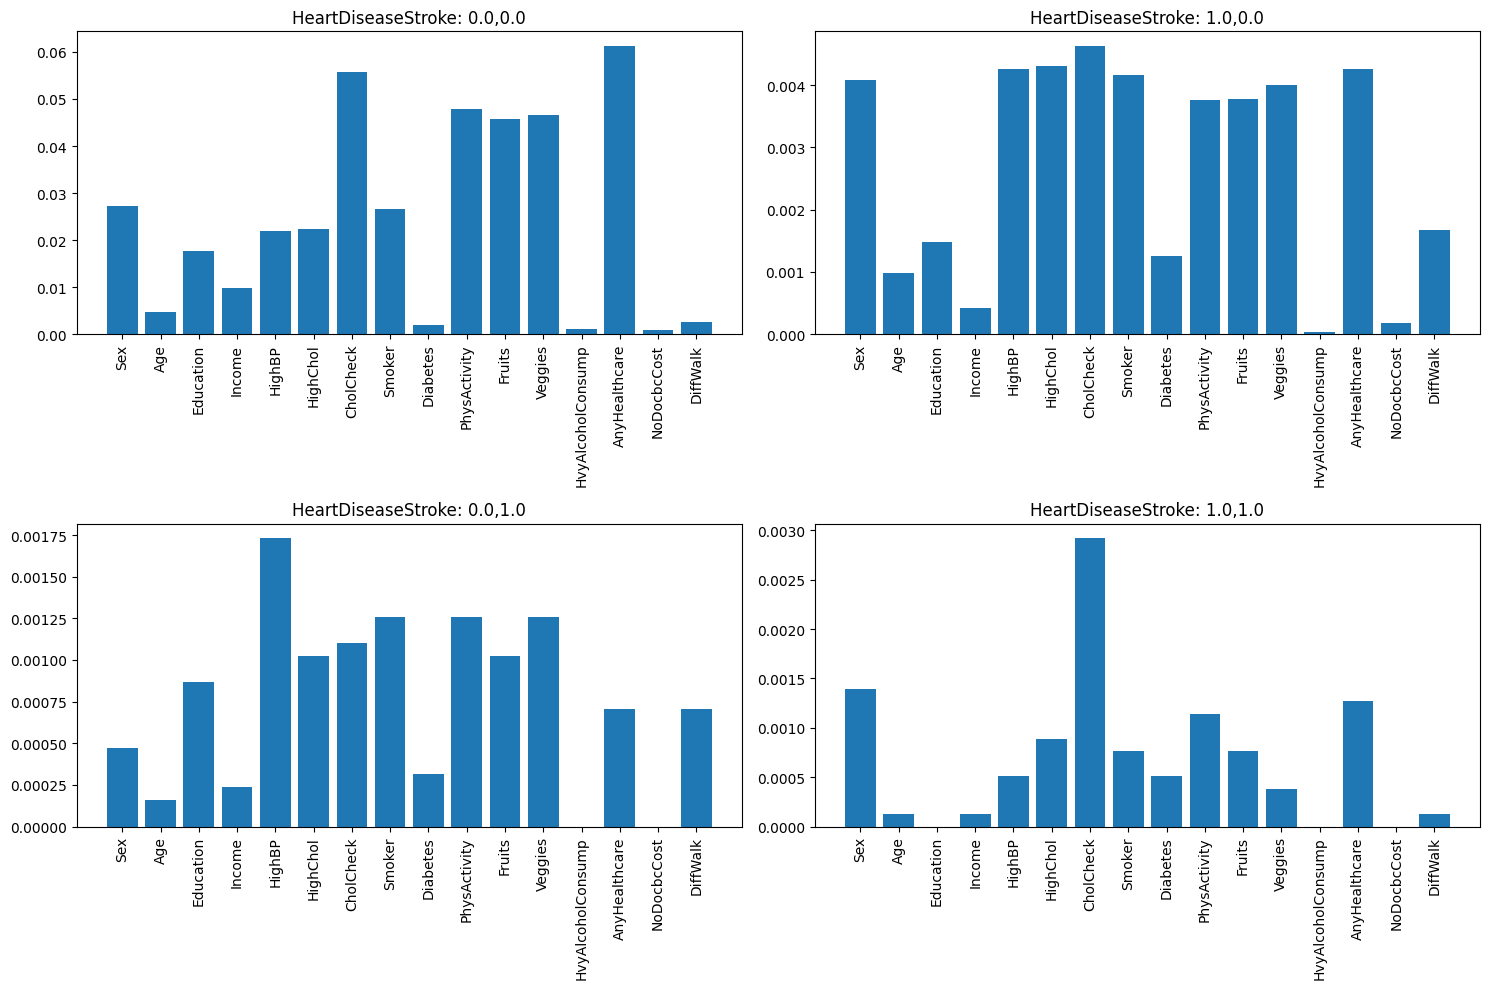

In [23]:
from sklearn.feature_selection import mutual_info_classif

# Create a dictionary to hold the results
results = {}

# Loop over each category in 'HeartDiseaseStroke'
for category in df['HeartDiseaseStroke'].unique():
    # Filter the data for the current category
    df_filtered = df[df['HeartDiseaseStroke'] == category]

    # Calculate the mutual information with all other variables
    variables = ['Sex', 'Age', 'Education', 'Income', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
    mutual_infos = {var: mutual_info_classif(df_filtered[[var]], df_filtered['HeartDiseaseStroke'])[0] 
                      for var in variables}

    # Add the results to the dictionary
    results[category] = mutual_infos

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (category, mutual_infos) in enumerate(results.items()):
    names = list(mutual_infos.keys())
    values = list(mutual_infos.values())

    axs[i].bar(names, values)
    axs[i].set_title(f'HeartDiseaseStroke: {category}')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## Conditional Entropy between infused variables and other infused variables

In [11]:
from scipy.stats import entropy

def conditional_entropy(x, y):
    joint_prob = pd.crosstab(x, y, normalize='all')
    cond_prob = joint_prob.div(joint_prob.sum(axis=0), axis=1)
    cond_ent = - (joint_prob * np.log2(cond_prob)).sum().sum()
    return cond_ent

# Calculate the conditional entropy for each combination
variables = ['HeartDiseaseorAttack', 'Age', 'Smoker']
combinations = [(0, 0), (0, 1), (1, 0), (1, 1)]

for combo in combinations:
    age_val, smoker_val = combo
    df_filtered = df[(df['Age'] == age_val) & (df['Smoker'] == smoker_val)]
    ce = conditional_entropy(df_filtered['HeartDiseaseorAttack'], df_filtered['HeartDiseaseorAttack'])
    print(f"Conditional Entropy for Age={age_val} and Smoker={smoker_val}: {ce}")

Conditional Entropy for Age=0 and Smoker=0: -0.0
Conditional Entropy for Age=0 and Smoker=1: -0.0
Conditional Entropy for Age=1 and Smoker=0: -0.0
Conditional Entropy for Age=1 and Smoker=1: -0.0


c:\Users\howie\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
c:\Users\howie\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
